# LAB2. IMAGE FILTRATION

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### №1. Image shift:

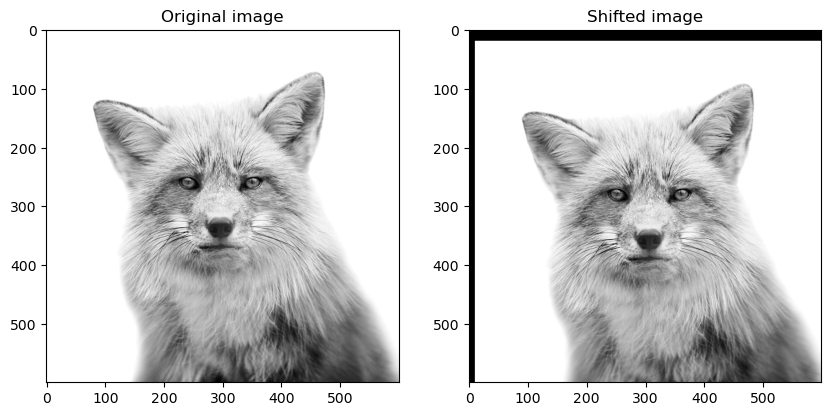

In [10]:
def shift_image(image, shift_x, shift_y):
    height, width = image.shape

    shifted_image = np.zeros_like(image)

    shifted_image[max(0, shift_y):min(height, height + shift_y),
                  max(0, shift_x):min(width, width + shift_x)] = \
        image[max(0, -shift_y):min(height - shift_y, height),
              max(0, -shift_x):min(width - shift_x, width)]

    return shifted_image

original_image = np.array(Image.open("Example.jpg").convert("L"))

# →10 , ↓20
shifted_image = shift_image(original_image, shift_x=10, shift_y=20)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(shifted_image, cmap="gray")
plt.title("Shifted image")

plt.show()

###  №2. Inversion:

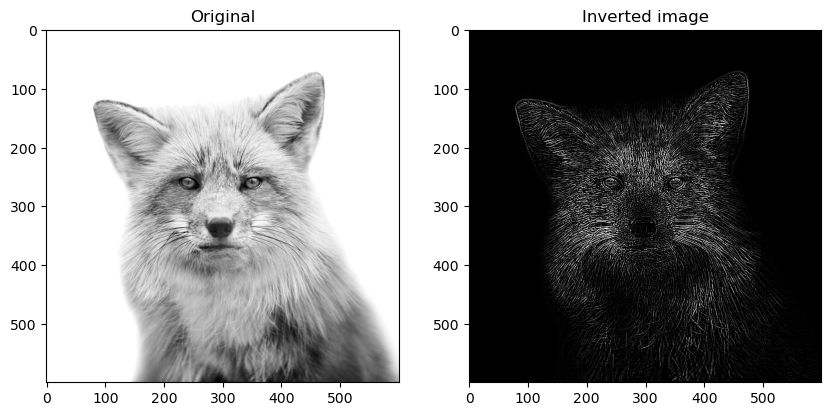

In [4]:
def invert_image(image):
    
    height, width = image.shape
    inverted_image = np.zeros_like(image, dtype=float)

    inversion_filter = np.array([[-1, -1, -1],
                                 [-1, 8, -1],
                                 [-1, -1, -1]])
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            inverted_image[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * inversion_filter)
            
    inverted_image = np.clip(inverted_image, 0, 255)

    return inverted_image.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

inverted_image = invert_image(original_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap="gray")
plt.title("Inverted image")

plt.show()

### №3. Gaussian filter (size 11 x 11): 

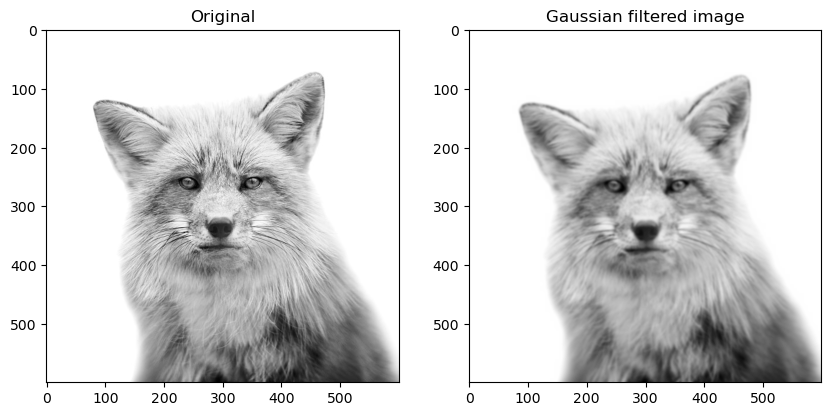

In [8]:
def gaussian_filter(size, sigma):

    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def apply_gaussian_filter(image, size, sigma):
    
    height, width = image.shape
    smoothed_image = np.zeros_like(image, dtype=float)

    kernel = gaussian_filter(size, sigma)

    for i in range(height):
        for j in range(width):
            total = 0
            count = 0

            for k in range(size):
                for l in range(size):
                    if 0 <= i - k < height and 0 <= j - l < width:
                        total += image[i - k, j - l] * kernel[k, l]
                        count += kernel[k, l]

            smoothed_image[i, j] = total / count if count > 0 else 0
    return smoothed_image.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

smoothed_image = apply_gaussian_filter(original_image, size=11, sigma=1.5)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap="gray")
plt.title("Gaussian filtered image")

plt.show()

### №4. Diagonale blurring: 

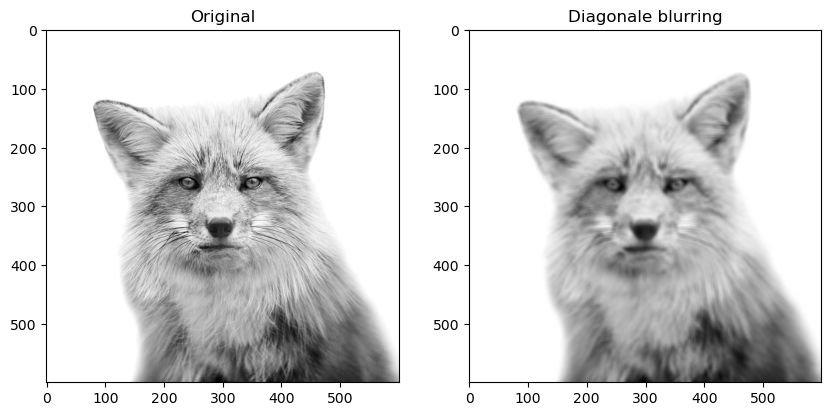

In [10]:
def diagonal_blur(image, size):

    height, width = image.shape
    blurred_image = np.zeros_like(image, dtype=float)

    for i in range(height):
        for j in range(width):
            total = 0
            count = 0

            for k in range(size):
                for l in range(size):
                    if 0 <= i - k < height and 0 <= j - l < width:
                        total += image[i - k, j - l]
                        count += 1

            blurred_image[i, j] = total / count if count > 0 else 0

    return blurred_image.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

blurred_diagonal_image = diagonal_blur(original_image, size=7)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(blurred_diagonal_image, cmap="gray")
plt.title("Diagonale blurring")

plt.show()

### №5. Sharpening:

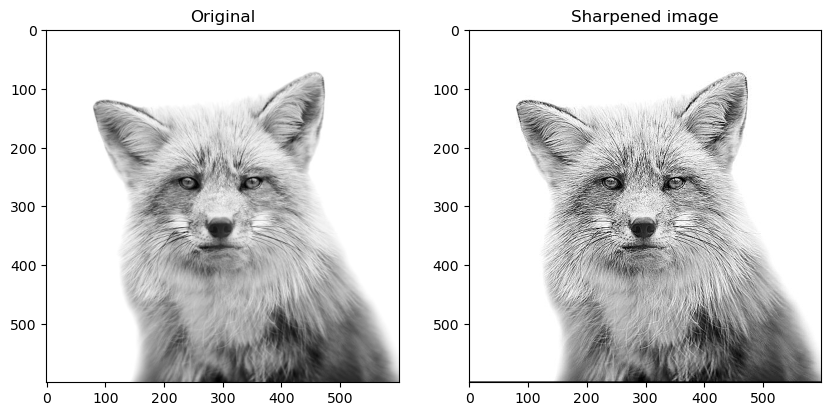

In [31]:
def sharpen_image(image):
    
    height, width = image.shape
    sharpened_image = np.zeros_like(image, dtype=float)

    laplacian_filter = np.array([[0, -1, 0],
                                 [-1, 5, -1],
                                 [0, -1, 0]])

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            sharpened_image[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * laplacian_filter)
            
    sharpened_image = np.clip(sharpened_image, 0, 255)

    return sharpened_image.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

sharpened_image = sharpen_image(original_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened image")

plt.show()


### №6. Top sobel filter:

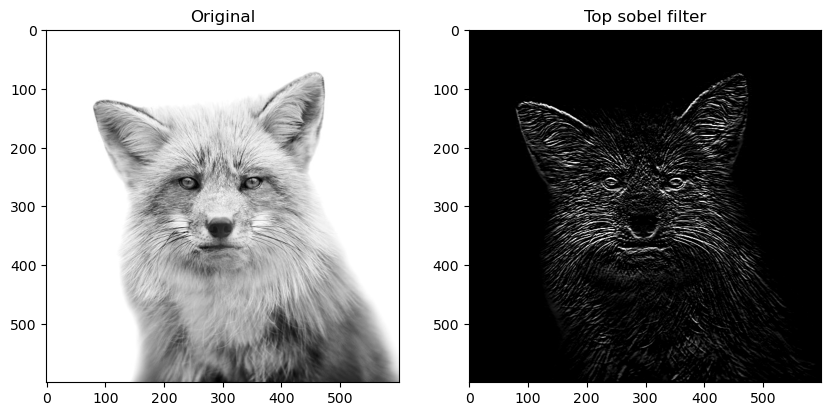

In [11]:
def sobel_top_filter(image):

    height, width = image.shape
    sobel_result = np.zeros_like(image, dtype=float)

    sobel_operator = np.array([[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]])
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            sobel_result[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * sobel_operator)

    sobel_result = np.clip(sobel_result, 0, 255)

    return sobel_result.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

sobel_vertical_result = sobel_vertical_filter(original_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(sobel_vertical_result, cmap="gray")
plt.title("Top sobel filter")

plt.show()

### №7. Edge detection:

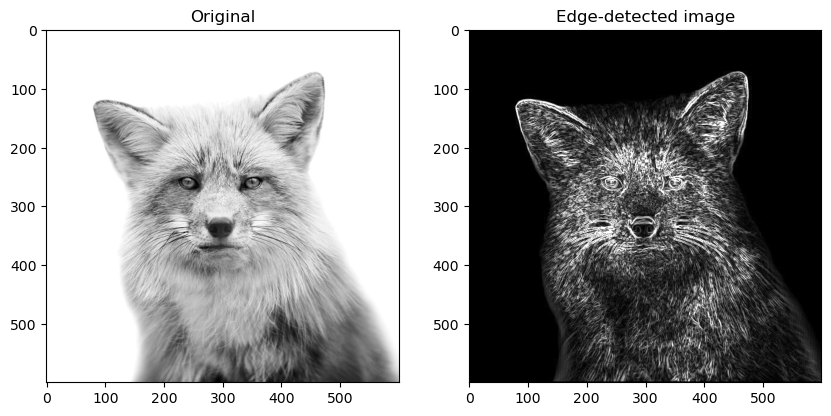

In [7]:
def edge_detection_filter(image):

    height, width = image.shape
    edge_result = np.zeros_like(image, dtype=float)

    sobel_horizontal_operator = np.array([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]])

    sobel_vertical_operator = np.array([[-1, -2, -1],
                                        [0, 0, 0],
                                        [1, 2, 1]])

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            horizontal_gradient = np.sum(image[i - 1:i + 2, j - 1:j + 2] * sobel_horizontal_operator)
            vertical_gradient = np.sum(image[i - 1:i + 2, j - 1:j + 2] * sobel_vertical_operator)

            edge_result[i, j] = np.sqrt(horizontal_gradient**2 + vertical_gradient**2)

    edge_result = np.clip(edge_result, 0, 255)
    return edge_result.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

edge_result = edge_detection_filter(original_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(edge_result, cmap="gray")
plt.title("Edge-detected image")

plt.show()

### №8. Mosaic filtration:

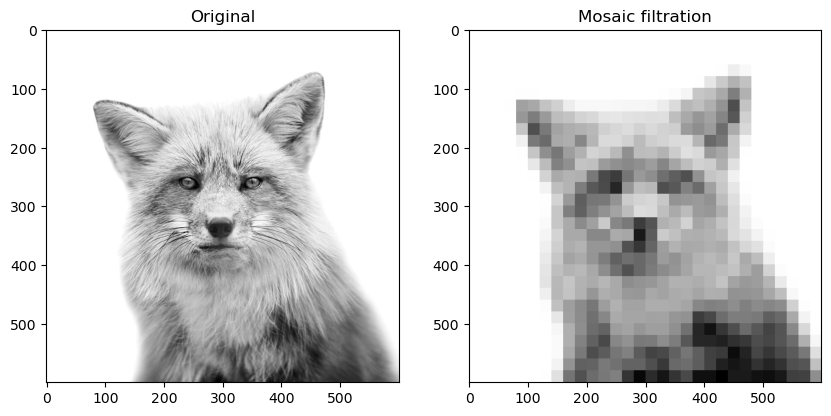

In [55]:
def mosaic_filter(image, block_size=10):
    
    height, width = image.shape
    mosaic_result = np.zeros_like(image, dtype=float)

    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block_average = np.mean(image[i:i+block_size, j:j+block_size])
    
            # Fill in the block with average values
            mosaic_result[i:i+block_size, j:j+block_size] = block_average
    
    mosaic_result = np.clip(mosaic_result, 0, 255)
    
    return mosaic_result.astype(np.uint8)

original_image = np.array(Image.open("Example.jpg").convert("L"))

mosaic_result = mosaic_filter(original_image, block_size=20)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(mosaic_result, cmap="gray")
plt.title("Mosaic filtration")

plt.show()